<a href="https://colab.research.google.com/github/guido-niku/NLP-yelp/blob/main/fastaiYelp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#objective, preprocessing/EDA, model and baseline, improvements

# <b> Welp, we trying yelp</b><br/>
1,569,264 samples from the Yelp Dataset Challenge 2015. This subset has 280,000 training samples and 19,000 test samples in each polarity.
dataset is a subset of Yelp's businesses, reviews, and user data. <br/>
In total there are 560,000 training samples and 38,000 testing samples. Negative polarity is class 1, and positive class 2.

In [ ]:
!wget https://s3.amazonaws.com/fast-ai-nlp/yelp_review_polarity_csv.tgz

--2021-02-08 06:27:03--  https://s3.amazonaws.com/fast-ai-nlp/yelp_review_polarity_csv.tgz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.32.254
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.32.254|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 166373201 (159M) [application/x-tar]
Saving to: ‘yelp_review_polarity_csv.tgz’

yelp_review_polarit 100%[===================>] 158.67M  50.4MB/s    in 3.1s    

2021-02-08 06:27:06 (50.4 MB/s) - ‘yelp_review_polarity_csv.tgz’ saved [166373201/166373201]



In [ ]:

!tar -xvzf yelp_review_polarity_csv.tgz
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
#hide
from fastbook import *

from fastai.text.all import *

yelp_review_polarity_csv/
yelp_review_polarity_csv/train.csv
yelp_review_polarity_csv/readme.txt
yelp_review_polarity_csv/test.csv


In [ ]:
path = Path('yelp_review_polarity_csv')
train_csv = path/'train.csv'
train = pd.read_csv(train_csv, header=None) 
train.head() #Checkhe first few records of the train data frame

,0,1
0,1,"Unfortunately, the frustration of being Dr. Goldberg's patient is a repeat of the experience I've had with so many other doctors in NYC -- good doctor, terrible staff. It seems that his staff simply never answers the phone. It usually takes 2 hours of repeated calling to get an answer. Who has time for that or wants to deal with it? I have run into this problem with many other doctors and I just don't get it. You have office workers, you have patients with medical needs, why isn't anyone answering the phone? It's incomprehensible and not work the aggravation. It's with regret that I..."
1,2,"Been going to Dr. Goldberg for over 10 years. I think I was one of his 1st patients when he started at MHMG. He's been great over the years and is really all about the big picture. It is because of him, not my now former gyn Dr. Markoff, that I found out I have fibroids. He explores all options with you and is very patient and understanding. He doesn't judge and asks all the right questions. Very thorough and wants to be kept in the loop on every aspect of your medical health and your life."
2,1,"I don't know what Dr. Goldberg was like before moving to Arizona, but let me tell you, STAY AWAY from this doctor and this office. I was going to Dr. Johnson before he left and Goldberg took over when Johnson left. He is not a caring doctor. He is only interested in the co-pay and having you come in for medication refills every month. He will not give refills and could less about patients's financial situations. Trying to get your 90 days mail away pharmacy prescriptions through this guy is a joke. And to make matters even worse, his office staff is incompetent. 90% of the time when you c..."
3,1,"I'm writing this review to give you a heads up before you see this Doctor. The office staff and administration are very unprofessional. I left a message with multiple people regarding my bill, and no one ever called me back. I had to hound them to get an answer about my bill. \n\nSecond, and most important, make sure your insurance is going to cover Dr. Goldberg's visits and blood work. He recommended to me that I get a physical, and he knew I was a student because I told him. I got the physical done. Later, I found out my health insurance doesn't pay for preventative visits. I received an..."
4,2,"All the food is great here. But the best thing they have is their wings. Their wings are simply fantastic!! The \""Wet Cajun\"" are by the best & most popular. I also like the seasoned salt wings. Wing Night is Monday & Wednesday night, $0.75 whole wings!\n\nThe dining area is nice. Very family friendly! The bar is very nice is well. This place is truly a Yinzer's dream!! \""Pittsburgh Dad\"" would love this place n'at!!"


First column is category(1 or 2), second is the review

In [ ]:
train[0].unique() #checking the number of categories, not necessary, just to be sure...

array([1, 2])

In [ ]:
dls = TextDataLoaders.from_df(train, path=path, text_col=1, label_col=0)
dls.show_batch(max_n=3)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


,text,category
0,"xxbos a hands down must see attraction . xxmaj the first time i saw it in 2006 they played xxmaj my xxmaj heart xxmaj will xxmaj go xxmaj on by xxmaj celine xxmaj dion . xxmaj it was so beautiful i almost cried ! xxmaj the strip side offers the best views in my opinion . \n\n xxmaj the fountains are set in a 9 acre manmade lake . xxmaj they incorporate a network of pipes with more than 1,200 nozzles that make it possible to stage fountain displays coordinated with more than 4,500 lights . xxmaj it is estimated that the fountains cost $ 75 million to build . xxmaj the fountains were created by xxup wet , a design firm specializing in inventive fountains and architectural water features . \n\n xxmaj here are the fountain show times : \n\n xxmaj monday - xxmaj friday \n 3:00 xxup pm",2
1,"xxbos xxmaj when trying to board xxup us xxmaj airways xxmaj flight xxunk on 2 / 16 / 11 the gate agent , xxmaj marvin xxup b , told me i could bring my guitar on board the plane by to see if there was room and it was up to the flight attendants . \n\n i was on the jet way when he came up to me and his demeanor had completely changed . xxmaj he said very sternly , nearly yelling , that i would not be able to bring it on board . xxmaj it caused people in line on the jet bridge 10 people in front of me to turn around and stare . i reminded him that he had just told me it was up to the flight attendants . xxmaj in a huff he said fine and i continued to wait . \n\n xxmaj",1
2,"xxbos xxmaj i 'm not one to slam a service , especially if i have n't used it , unfortunately here 's my experience . i called xxmaj xxunk becuase of everyones ' 5 star comments on xxmaj yelp . i was calling for a quote . i told the owner that i had brown dog ticks in the backyard and some in the house on the dog beds . xxmaj he asked for my address ( arcadia ) and the size of my home and lot . i told him 2400 sq . feet , and the lot i was nt sure of but that it was around 3,500 sq . feet . xxmaj he quoted me $ 700 for the size of my property for outside and inside treatment ( visiting a total of 3 times in a 30 day period so every 7 - 10 days or",1


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


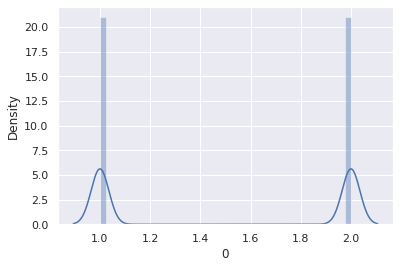

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt 

y = train[0]
sns.set(color_codes= True)
sns.distplot(y)


In [ ]:
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(1, 1e-2)


learn.fine_tune(1, 1e-2)


learn.fine_tune(1, 1e-2)


learn.fine_tune(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time


RuntimeError: ignored